In [3]:
import pandas as pd

macbook = pd.read_csv('~/data/data/macbook.csv')
print(macbook.shape)
macbook.head()

(80, 2)


,used_years,price
0,2.65,175
1,3.80,63
2,0.95,273
3,4.50,133
4,4.45,106


In [4]:
import matplotlib.pyplot as plt
# 실행한 브라우저에서 바로 그림을 볼 수 있게 해줌
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' # 더 높은 해상도로 출력한다.

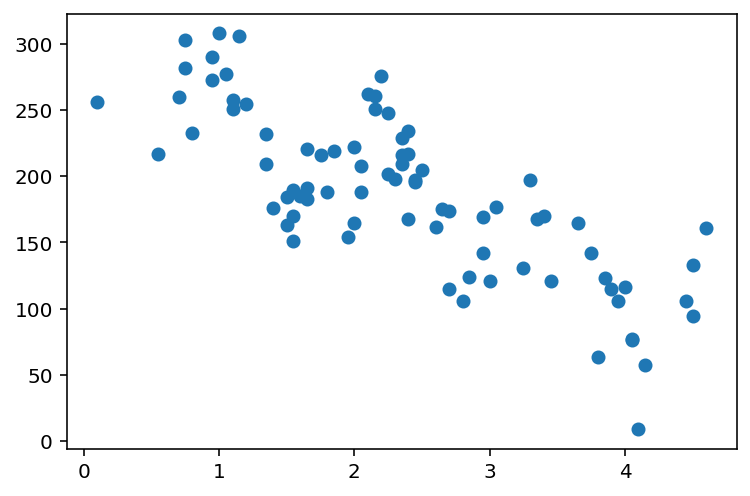

In [5]:
plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

In [6]:
# 상관관계 보기
import numpy as np

# np.corrcoef(x, y)를 사용합니다.
np.corrcoef(macbook['used_years'], macbook['price']) # 음의 상관관계를 볼수있다

array([[ 1.        , -0.78972238],
       [-0.78972238,  1.        ]])

In [8]:
# 풀고자하는것은 사용연수를 입력받아(x) 가격을예측(y)
x = macbook["used_years"].values
y = macbook["price"].values

In [10]:
# 1차함수 만들기
def model(x, w, b):
    y = w * x + b
    return y

model(x=5, w=2, b=1)

11

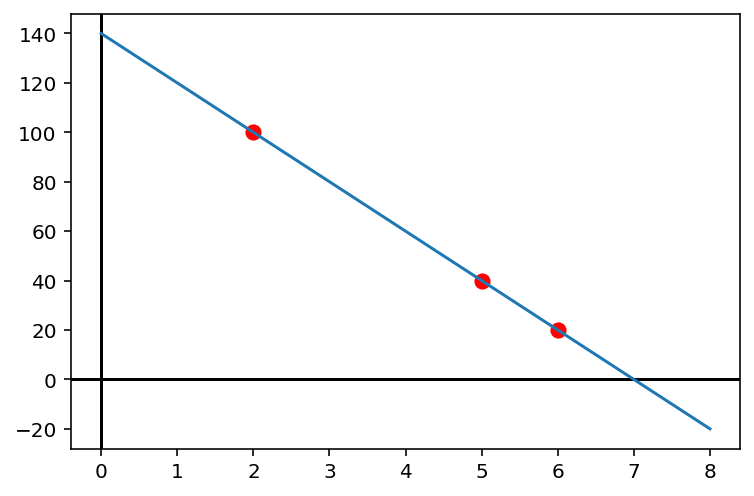

In [11]:
# 사용연수가 2,5,6인 맥북각격 그래프
# x축, y축 그리기
plt.axvline(x=0, c='black')
plt.axhline(y=0, c='black')

# y = wx + b 일차함수 그리기
x = np.linspace(0, 8, 9)
y = model(x, w=-20, b=140) # y = -20x + 140
plt.plot(y)

# 나의 (x, y) 점 찍기
x_data = [2, 5, 6]
y_data = [100, 40, 20]
plt.scatter(x_data, y_data, c='r', s=50)

plt.show()

In [15]:
# 최적의 일차함수를 구해보기

w = 3.1 # 기울기 아무거나
b = 2.3 # y절편 아무거나

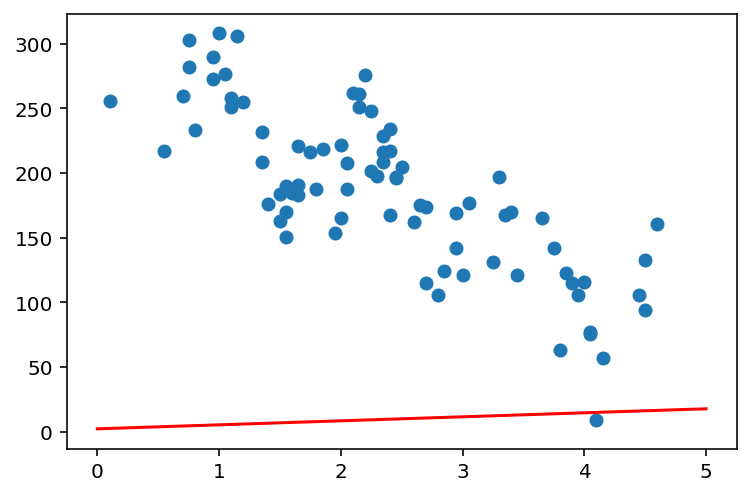

In [16]:
x = np.linspace(0, 5, 6)
y = model(x, w, b) # y = 3.1x + 2.3
plt.plot(y, c='r')

plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

In [22]:
x = macbook["used_years"].values
x

prediction = model(x, w, b) # 현재 w = 3.1, b = 2.3
prediction

array([10.515, 14.08 ,  5.245, 16.25 , 16.095, 10.67 , 11.755,  9.275,
        9.43 ,  8.035,  6.95 ,  5.245, 10.36 ,  4.005,  8.655,  4.625,
       14.545, 10.98 ,  8.655,  5.865,  6.485, 12.685,  6.485,  9.895,
        9.74 ,  2.61 , 12.995,  9.585,  4.47 ,  5.555,  7.725, 15.01 ,
       16.25 , 14.7  ,  8.5  ,  9.895, 10.05 ,  8.81 , 11.6  , 14.855,
       10.67 ,  8.965, 12.53 ,  9.74 , 11.135,  7.415,  7.105,  8.965,
       12.84 ,  7.105,  4.78 , 11.445,  9.74 ,  6.64 ,  7.415,  9.275,
       14.235, 14.39 , 16.56 ,  9.585, 14.855,  6.02 ,  8.345,  7.26 ,
        8.5  ,  7.88 , 13.925, 13.615,  9.585,  9.12 ,  5.4  , 15.165,
        5.71 ,  7.105, 11.445,  6.95 ,  7.415,  5.71 , 12.375,  4.625])

In [23]:
macbook['prediction'] = prediction
macbook.head() # 실제값과 많은 차이가남..

,used_years,price,prediction
0,2.65,175,10.515
1,3.80,63,14.080
2,0.95,273,5.245
3,4.50,133,16.250
4,4.45,106,16.095


In [24]:
# 실제값과 예측값 간의 차이
macbook['error'] = macbook['price'] - macbook['prediction']
macbook.head()

,used_years,price,prediction,error
0,2.65,175,10.515,164.485
1,3.80,63,14.080,48.920
2,0.95,273,5.245,267.755
3,4.50,133,16.250,116.750
4,4.45,106,16.095,89.905


In [25]:
# 평가지표 RMSE
def RMSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    rmse = mse ** 0.5        # MSE의 제곱근
    return rmse

In [27]:
# 평가지표 RMSE를 통해 얼마나 차이가 있는지 평가해보기
x = macbook["used_years"].values
y = macbook["price"].values

predictions = model(x, w, b)
print(predictions)

rmse = RMSE(predictions, y)
rmse

[10.515 14.08   5.245 16.25  16.095 10.67  11.755  9.275  9.43   8.035
  6.95   5.245 10.36   4.005  8.655  4.625 14.545 10.98   8.655  5.865
  6.485 12.685  6.485  9.895  9.74   2.61  12.995  9.585  4.47   5.555
  7.725 15.01  16.25  14.7    8.5    9.895 10.05   8.81  11.6   14.855
 10.67   8.965 12.53   9.74  11.135  7.415  7.105  8.965 12.84   7.105
  4.78  11.445  9.74   6.64   7.415  9.275 14.235 14.39  16.56   9.585
 14.855  6.02   8.345  7.26   8.5    7.88  13.925 13.615  9.585  9.12
  5.4   15.165  5.71   7.105 11.445  6.95   7.415  5.71  12.375  4.625]


188.81322969819274

In [33]:
# 손실함수 만들기
def loss(x, w, b, y):
    predictions = model(x, w, b)
    L = RMSE(predictions, y)
    return L

# 최적의 기울기를 찾아가는것
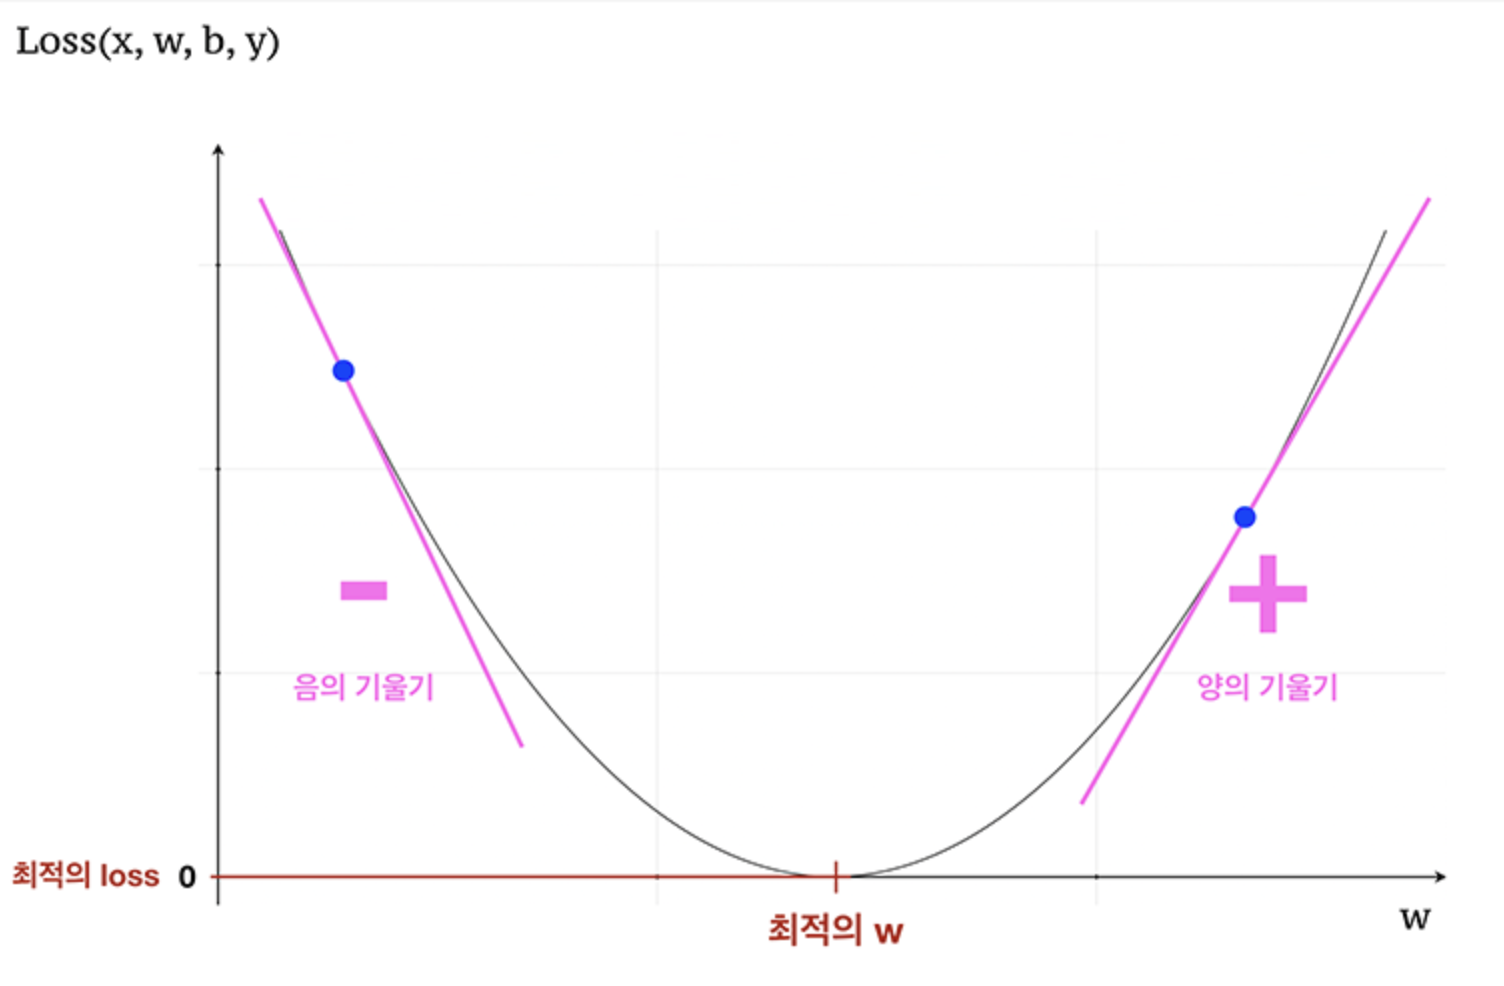

w′=w−ηg

w′: 새로운 w
w: 현재 w
n: 얼마나 업데이트할지 결정하는 상수 (학습률)
g: 기울기, 또는 그래디언트

g가 음수라면 w -g 식에서 음수를 빼게되어서 (+)가되어 새로운 w′가 커짐

In [28]:
def gradient(x, w, b, y):
    dw = (loss(x, w + 0.0001, b, y) - loss(x, w, b, y)) / 0.0001
    db = (loss(x, w, b + 0.0001, y) - loss(x, w, b, y)) / 0.0001
    return dw, db

In [29]:
LEARNING_RATE = 1

1. 입력 데이터  x와 정답데이터 y준비
2. 초기 w,b를 랜덤하게 선택
3. 현재의 w와 b로 모델이 prediction을 예측하고, 그 값과 y값을 비교해서 손실함수 값 계산
4. 손실함수값을 계한함과 동시에 그점에서의 기울기(gradient) 계산
5. 계산된 gradient를 활용해서 w′=w-ng, b′=b-ng로 업데이트
6. 3~5 과정을 손실함수가 충분히 줄어들 때까지 반복

In [30]:
x = macbook["used_years"].values
y = macbook["price"].values
# 초기값 랜덤하게 지정
w = 3.1
b = 2.3
w, b

(3.1, 2.3)

In [31]:
# 학습이 어떻게 진행되는지 보기위한 저장용
losses = []

In [34]:
for i in range(1, 2001):
    dw, db = gradient(x, w, b, y)   # 3, 4번: 모델이 prediction을 예측하고, 손실함수값을 계산함과 동시에 기울기 계산
    w -= LEARNING_RATE * dw         # 5번: w = w - η * dw 로 업데이트
    b -= LEARNING_RATE * db         # 5번: b = b - η * db 로 업데이트 
    L = loss(x, w, b, y)            # 현재의 loss 값 계산
    losses.append(L)                # loss 값 기록
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 108.0080
Iteration 200 : Loss 94.5709
Iteration 300 : Loss 81.8560
Iteration 400 : Loss 70.1799
Iteration 500 : Loss 59.9778
Iteration 600 : Loss 51.7475
Iteration 700 : Loss 45.8356
Iteration 800 : Loss 42.1474
Iteration 900 : Loss 40.1357
Iteration 1000 : Loss 39.1420
Iteration 1100 : Loss 38.6793
Iteration 1200 : Loss 38.4703
Iteration 1300 : Loss 38.3772
Iteration 1400 : Loss 38.3360
Iteration 1500 : Loss 38.3179
Iteration 1600 : Loss 38.3099
Iteration 1700 : Loss 38.3064
Iteration 1800 : Loss 38.3048
Iteration 1900 : Loss 38.3041
Iteration 2000 : Loss 38.3038


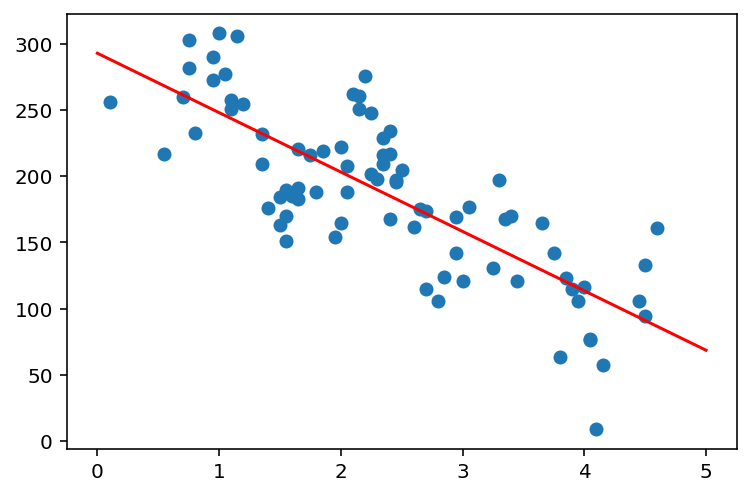

In [35]:
# 모델에 넣을 x 값들 준비
x = np.linspace(0, 5, 6)

# x, w, b를 모델에 넣어 y값 출력
y = model(x, w, b)

# 일차함수 y 그리기
plt.plot(y, c="r")


# 원본 데이터 점찍기
plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

In [37]:
test = pd.read_csv("~/data/data/macbook_test.csv")
print(test.shape)
test.head()

(20, 2)


,used_years,price
0,1.20,203
1,1.85,206
2,2.40,191
3,2.85,164
4,3.05,176


In [38]:
test_x = test['used_years'].values
test_y = test['price'].values

In [39]:
prediction = model(test_x, w, b)
test['prediction'] = prediction
test

,used_years,price,prediction
0,1.20,203,239.168506
1,1.85,206,209.965591
2,2.40,191,185.255432
3,2.85,164,165.038030
4,3.05,176,156.052518
5,3.35,136,142.574250
6,2.55,133,178.516298
7,2.60,181,176.269920
8,2.50,181,180.762676
9,3.10,86,153.806140


In [40]:
test['error'] = test['price'] - test['prediction']
test

,used_years,price,prediction,error
0,1.20,203,239.168506,-36.168506
1,1.85,206,209.965591,-3.965591
2,2.40,191,185.255432,5.744568
3,2.85,164,165.038030,-1.038030
4,3.05,176,156.052518,19.947482
5,3.35,136,142.574250,-6.574250
6,2.55,133,178.516298,-45.516298
7,2.60,181,176.269920,4.730080
8,2.50,181,180.762676,0.237324
9,3.10,86,153.806140,-67.806140


In [41]:
rmse = ((test['error'] ** 2).sum() / len(test)) ** 0.5
rmse

45.03918284717212

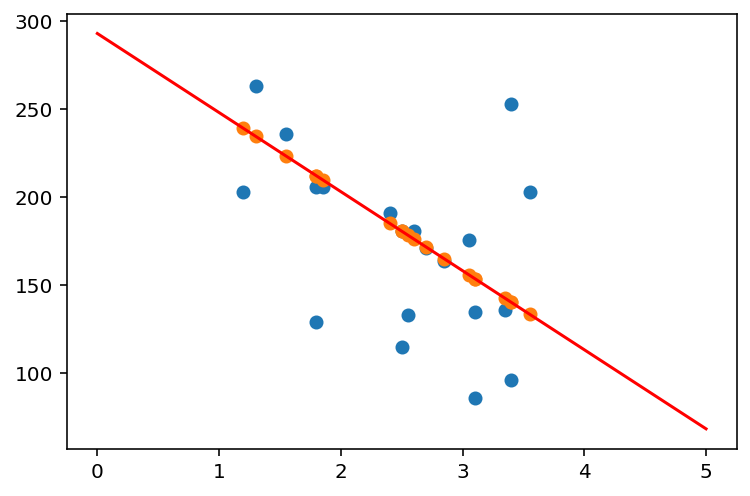

In [42]:
# 모델 일차함수 그리기
x = np.linspace(0, 5, 6)
y = model(x, w, b)
plt.plot(y, c="r")

# 실제 데이터 값
plt.scatter(test['used_years'], test['price'])

# 모델이 예측한 값
plt.scatter(test['used_years'], test['prediction'])
plt.show()